### 3 specie model

Let's try acidification, acetoclastic and hydrogenotrophic X1, X2, X3


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas

In [36]:
S1 = np.matrix(pandas.read_excel('r1.xlsx'))
S2 = np.matrix(pandas.read_excel('r2.xlsx'))
S3 = np.matrix(pandas.read_excel('r3.xlsx'))


### Defining the parameters

In [95]:
mu1max, mu2max =0.04, 0.05
thmax1,thmax2=0.3,0.3
Km=0.003


In [96]:
def response_fun(t,C):
    
    Cs, Cx1, Cx2, Cx3, Ca,Ch, Cc, Cm, Cn=C[0],C[1],C[2],C[3],C[4],C[5],C[6],C[7],C[8]
    #Cs, Cx1, Cx2, Cx3, Ca = C[0],C[1],C[2],C[3],C[4]
    
    mu1= mu1max*Cs/(Km+Cs)
    mu2=mu2max*Ca/(Km+Ca)
    th1=thmax1*Cs/(Km+Cs)
    th2=thmax2*Ca/(Km+Ca)
    th3=th2

    C1 = np.matrix([[0,0,0,0,mu1,0,th1,0]]).T  #X1
    C2 = np.matrix([[0,0,0,0,mu2, th2]]).T     #X2
    

    r1 = np.linalg.solve(S1,C1)
    r2 = np.linalg.solve(S2,C2)
    
    if r1[7,0] <= 0.01:
            r3=np.matrix([[0],[0],[0],[0],[0],[0],[0],[0]])
    else:
            C3= np.matrix([[0,0,0,0,-r1[7,0]*Cx1/Cx3, th3]]).T     #X2
            r3=  np.linalg.solve(S3,C3)
  
    return [r1[0,0]*Cx1,                # rs
            r1[1,0]*Cx1,                # rx1
            r2[1,0]*Cx2,                # rx2
            r3[3,0]*Cx3,                # rx3
            r1[2,0]*Cx1+r2[0,0]*Cx2,     # raa
            r1[7,0]*Cx1+r3[1,0]*Cx3,     # rh
            r1[6,0]*Cx1+r2[5,0]*Cx2+r3[0,0]*Cx3,   #rco2
            r2[2,0]*Cx2+r3[2,0]*Cx3,    #rch4
            r1[4,0]*Cx1+r2[4,0]*Cx2+r3[5,0]*Cx3]    #rnh3   
                              

In [97]:
r3=np.matrix([[0],[0],[0],[0],[0],[0],[0],[0]])
r3

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

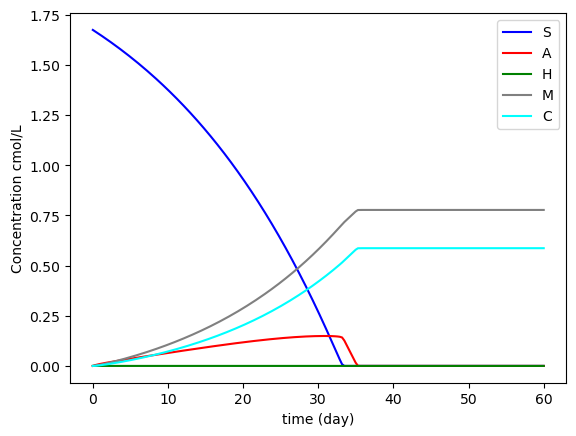

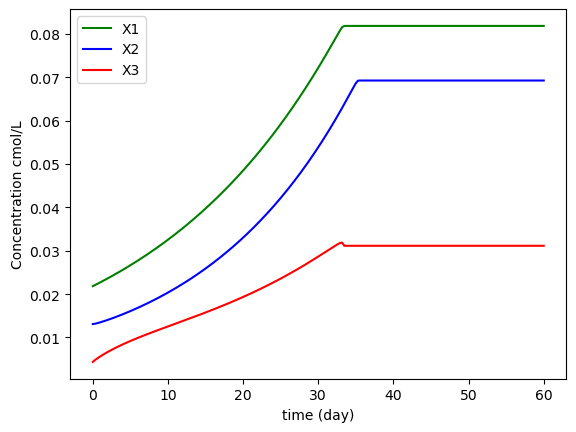

In [98]:
MMx=12+S1[1,1]+S1[2,1]*16+S1[3,1]*14
MMs=12+S1[1,0]+S1[2,0]*16+S1[3,0]*14

Cso=40/MMs
Cxo1=0.5/MMx
Cxo2=0.3/MMx
Cxo3=0.1/MMx

Co=[Cso,Cxo1, Cxo2, Cxo3,0,0,0,0,0]  #S,X1,X2,X3,AA,H2,CO2, CH4, NH3                     
tmax = 60                                
tspan=np.linspace(0,tmax,200)           
tper = (0,tmax)                          

Ci = solve_ivp(response_fun, tper, Co, dense_output = True, method = "LSODA")    # integration via odeint that calls apon response_fun

Cs, Cx1, Cx2, Cx3, Ca,Ch, Cc, Cm, Cn = Ci.sol(tspan)

plt.figure(1)
plt.plot(tspan, Cs, color='blue', label='S')
plt.plot(tspan, Ca, color='red', label='A')
plt.plot(tspan, Ch, color='green', label='H')
plt.plot(tspan, Cm, color='grey', label='M')
plt.plot(tspan, Cc, color='cyan', label='C')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (day)') 
plt.show() 

plt.figure(2)
plt.plot(tspan, Cx1, color='green',label='X1')
plt.plot(tspan, Cx2, color='blue',label='X2')
plt.plot(tspan, Cx3, color='red',label='X3')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (day)') 
plt.show() 

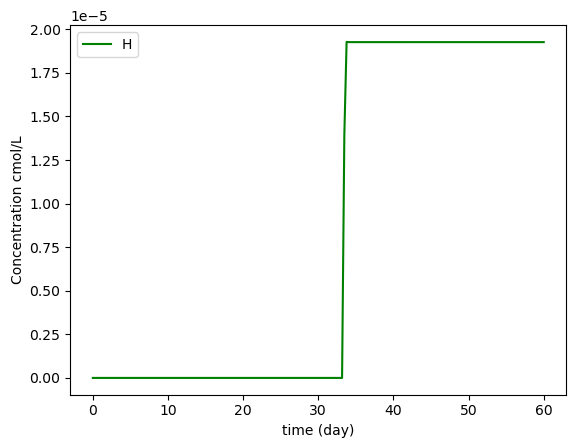

In [99]:
plt.figure(3)
plt.plot(tspan, Ch, color='green',label='H')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (day)') 
plt.show() 

In [100]:
Ci2=Ci.sol(tspan).T
r=np.asarray([response_fun(1,C) for C in Ci2])


In [ ]:
plt.figure(3)
plt.plot(tspan, Ch, color='green',label='H')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (day)') 
plt.show() 

In [66]:
a=Cm[-1]/(Cc[-1]+Cm[-1])
a

0.5698037627626801